# **Supermarket Sales Analysis**


## Executive Summary

- Total revenue and transaction trends were analyzed over the dataset period.
- Product line performance and customer spending behavior were evaluated.
- Six different visualizations (basic and advanced) were generated.
- Strong correlations were observed between gross income and total sales.

**Outcome:**
The analysis enables data-driven decision-making for inventory planning,
marketing strategy, and operational optimization.


## Introduction

### Problem Statement
Retail businesses generate large volumes of transactional data, but without
systematic analysis, valuable insights remain unused. Understanding sales
patterns, customer behavior, and product performance is critical for
maximizing revenue and efficiency.

### Objectives
- Analyze overall sales performance
- Identify best-performing product lines
- Understand customer payment preferences
- Generate actionable business recommendations


## Dataset Description

- **Source:** Supermarket Sales Dataset (CSV)
- **Records:** Transaction-level sales data
- **Key Attributes:**
  - Invoice ID
  - Product line
  - Unit price
  - Quantity
  - Total
  - Payment method
  - Rating


## Methodology

1. Data loading and inspection
2. Data validation and quality checks
3. Feature engineering
4. Exploratory Data Analysis (EDA)
5. Advanced analytical visualizations
6. Statistical analysis
7. Insight generation and recommendations


In [1]:
import sys
from pathlib import Path

# Add project root to Python path
PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from src.supermarket_sales_analysis.data_loading import load_data

df = load_data("../datasets/supermarket_sales.csv")
df.head()


,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Rating
0,INV000001,B,Mandalay,Member,Male,Food & Beverages,69.36,3,7.28,119.58,2023-08-08,18:54,Credit card,8.4
1,INV000002,C,Mandalay,Member,Female,Food & Beverages,35.25,1,6.62,137.13,2023-02-09,18:44,Credit card,4.3
2,INV000003,C,Naypyitaw,Normal,Female,Fashion Accessories,57.56,8,4.66,490.48,2023-08-24,16:16,Cash,9.6
3,INV000004,B,Naypyitaw,Member,Female,Food & Beverages,16.60,5,8.57,142.54,2023-02-09,11:35,Cash,4.5
4,INV000005,C,Yangon,Normal,Female,Food & Beverages,49.07,1,3.70,24.43,2023-07-04,8:56,Credit card,5.8


## Data Validation & Column Inspection


In [2]:
from src.supermarket_sales_analysis.data_validation import validate_data

validation_report = validate_data(df)
validation_report


{'rows': 2000,
 'columns': 14,
 'missing_values': {'Invoice_ID': 0,
  'Branch': 0,
  'City': 0,
  'Customer_Type': 0,
  'Gender': 0,
  'Product_Line': 0,
  'Unit_Price': 0,
  'Quantity': 0,
  'Tax': 0,
  'Total': 0,
  'Date': 0,
  'Time': 0,
  'Payment': 0,
  'Rating': 0},
 'duplicates': np.int64(0)}

## Feature Engineering
Derived additional fields to support trend analysis.


In [3]:
import pandas as pd

df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()


## Exploratory Data Analysis (Basic Visuals)


In [4]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_Type', 'Gender',
       'Product_Line', 'Unit_Price', 'Quantity', 'Tax', 'Total', 'Date',
       'Time', 'Payment', 'Rating', 'Day', 'Month'],
      dtype='object')

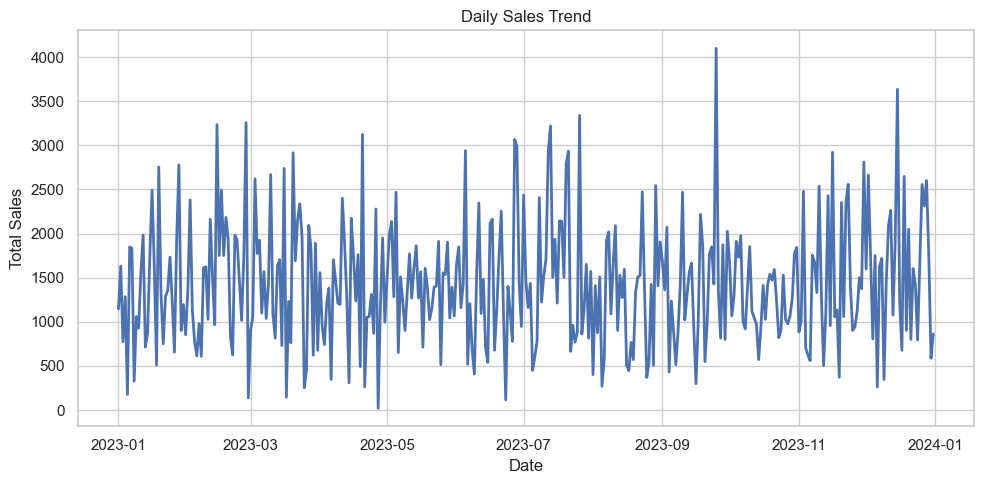

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Daily Sales Trend
daily_sales_nb = (
    df.groupby("Date")["Total"]
    .sum()
    .sort_index()
)

plt.figure(figsize=(10, 5))
plt.plot(daily_sales_nb.index, daily_sales_nb.values, linewidth=2)
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()



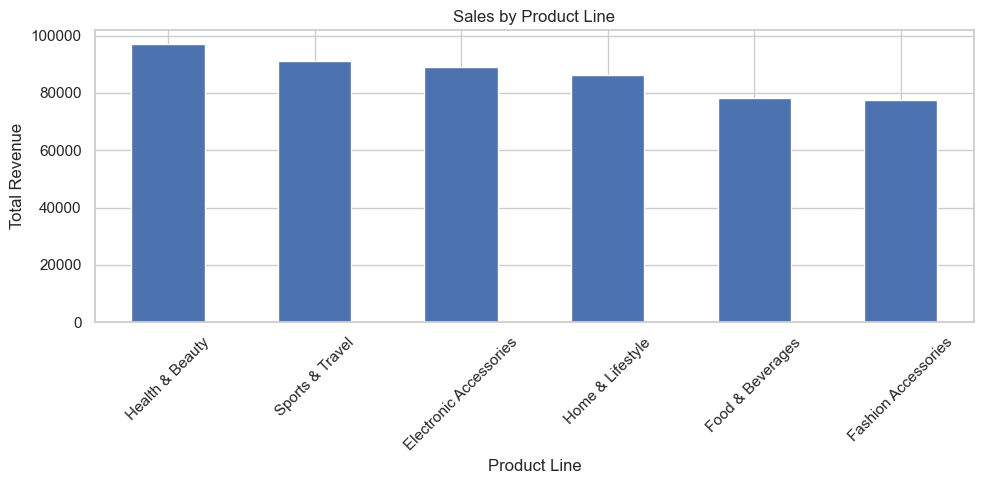

In [6]:
product_sales_nb = (
    df.groupby("Product_Line")["Total"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 5))
product_sales_nb.plot(kind="bar")
plt.title("Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


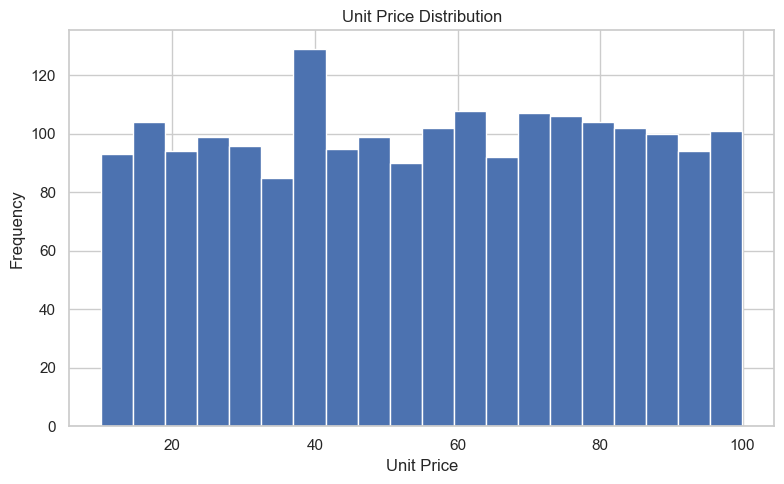

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(df["Unit_Price"], bins=20)
plt.title("Unit Price Distribution")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.tight_layout()

plt.show()


## Advanced Sales Analysis (Advanced Visuals)


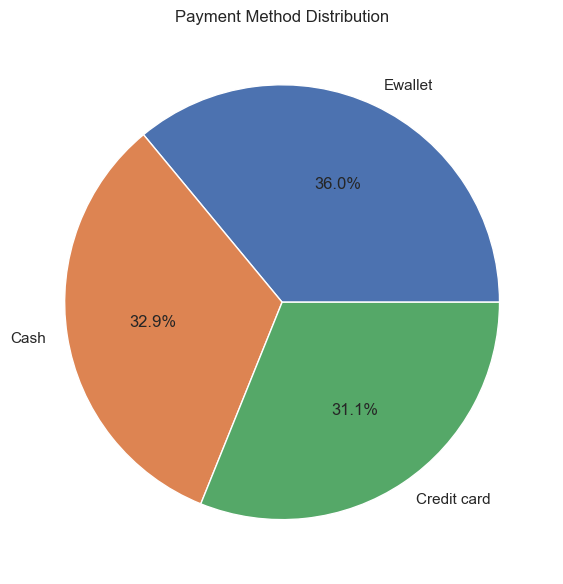

In [8]:
payment_counts = df["Payment"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%")
plt.title("Payment Method Distribution")
plt.tight_layout()

plt.show()


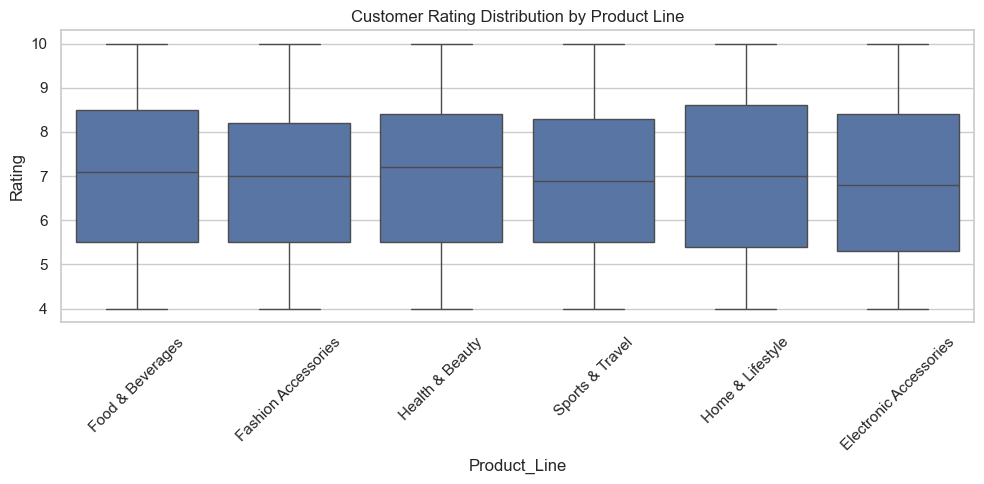

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Product_Line", y="Rating", data=df)
plt.xticks(rotation=45)
plt.title("Customer Rating Distribution by Product Line")
plt.tight_layout()

plt.show()


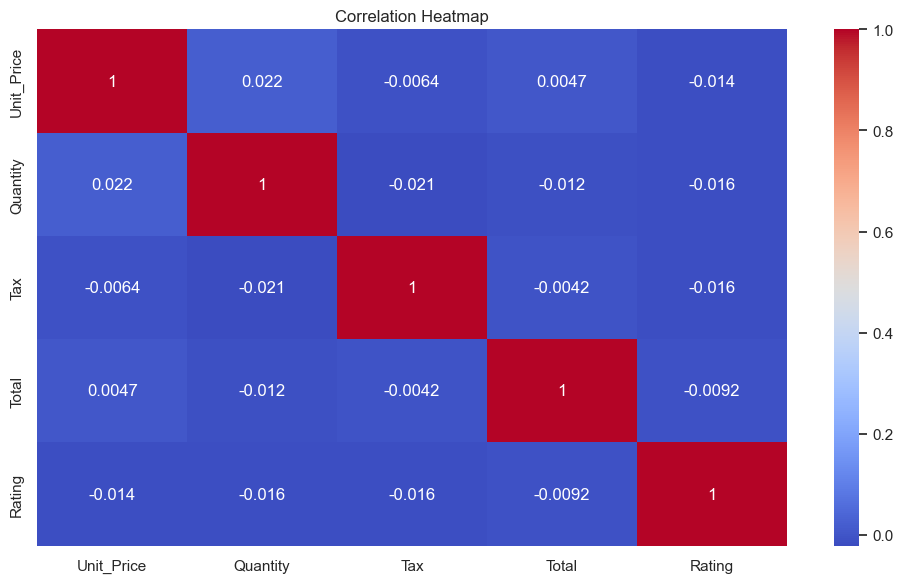

In [12]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.tight_layout()

plt.show()


## Statistical Analysis


In [11]:
from src.supermarket_sales_analysis.analysis import sales_kpis

total_sales, total_txn, avg_txn = sales_kpis(df)

total_sales, total_txn, avg_txn


(np.float64(519280.69), 2000, np.float64(259.640345))

## Key Findings

- High revenue concentration in selected product lines
- Digital payments dominate transaction volume
- Customer ratings vary significantly across product categories
- Strong correlation between gross income and total sales


## Business Insights & Recommendations

### Insights
- Top product lines contribute majority of revenue
- Certain categories show low ratings despite high sales

### Recommendations
1. Increase inventory for high-performing categories
2. Improve quality and pricing of low-rated products
3. Promote cashless payment incentives


## Conclusion & Future Scope

This analysis demonstrates how retail sales data can be transformed into
actionable insights using structured analytics and visualization techniques.

### Future Scope
- Customer segmentation analysis
- Profit margin optimization
- Time-series forecasting models
